[View in Colaboratory](https://colab.research.google.com/github/divsinha99/Million_Song_Recommender/blob/master/Recommender_project.ipynb)

# Download and Unzip file
## File download

In [0]:
complete_dataset_url = ' http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip'

## Define download locations

In [0]:
import os

datasets_path = os.path.join('..', 'datalab')

complete_dataset_path = os.path.join(datasets_path, 'train_triplets.txt.zip')

## Download the Files

In [0]:
import urllib

complete_f = urllib.request.urlretrieve (complete_dataset_url, complete_dataset_path)

## Extract the zip file into a folder

In [0]:
import zipfile


with zipfile.ZipFile(complete_dataset_path, "r") as z:
    z.extractall(datasets_path)


Listing shows that the zip file has been unzipped in the datalab directory.

In [6]:
!ls ../datalab

run.sh	train_triplets.txt  train_triplets.txt.zip  web


In [7]:
raw_data = sc.textFile("../datalab/train_triplets.txt")
raw_data.take(5)

['b80344d063b5ccb3212f76538f3d9e43d87dca9e\tSOAKIMP12A8C130995\t1',
 'b80344d063b5ccb3212f76538f3d9e43d87dca9e\tSOAPDEY12A81C210A9\t1',
 'b80344d063b5ccb3212f76538f3d9e43d87dca9e\tSOBBMDR12A8C13253B\t2',
 'b80344d063b5ccb3212f76538f3d9e43d87dca9e\tSOBFNSP12AF72A0E22\t1',
 'b80344d063b5ccb3212f76538f3d9e43d87dca9e\tSOBFOVM12A58A7D494\t1']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Triplets data [user, song, play_count]

In [37]:
triplet_dataset = pd.read_csv(data_home+"train_triplets.txt", 
                              nrows=10000,sep='\t', header=None, 
                              names=['user','song','play_count'])
triplet_dataset.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


We need to determine how many unique users (or songs) we should consider. As we have around a million users in the original dataset. 

If 20% of all the users account for around 80% of total play counts, then it would be a good idea to focus on those 20% rather than the entire population.

# User and total play counts
Finding out the total play counts of each user from the entire dataset. It can be done by summarizing the dataset by users (or by songs) and getting cumulative sum of play counts. But due to the size of the dataset pandas will run into trouble. 
So, we will be reading the file line by line and extract the play count information on a user (or a song) and persist that information for later use.

**Note**: This is a possible method to use in case the dataset size exceeds the memory available on their systems.

In [0]:
output_dict = {}
data_home = "../datalab/"
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
play_count_df = pd.DataFrame(output_list)
play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)

Total play count of top 10 users.

In [32]:
play_count_df.head(n =10)

,play_count,user
669980,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
402687,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
964856,8210,3fa44653315697f42410a30cb766a4eb102080bb
462404,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
991089,6494,d7d2d888ae04d16e994d6964214a1de81392ee04
234384,6472,4ae01afa8f2430ea0704d502bc7b57fb52164882
824276,6150,b7c24f770be6b802805ac0e2106624a517643c17
225988,5656,113255a012b2affeab62607563d03fbdf31b08e7
30701,5620,6d625c6557df84b60d90426c0116138b617b9449
355770,5602,99ac3d883681e21ea68071019dba828ce76fe94d


In [0]:

play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

In [0]:
play_count_df.to_csv('play_count_df.csv', index=False)
files.download('play_count_df.csv')

# Song and total play counts
Finding out the total play counts of each song from the entire dataset similarly as above.

In [0]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)

In [43]:
song_count_df.head(10)

,play_count,song
202,726885,SOBONKR12A58A7A7E0
199,648239,SOAUWYT12A81C206F1
218,527893,SOSXLTC12AF72A7F54
22,425463,SOFRQTD12A81C233C0
206,389880,SOEGIYH12A6D4FC0E3
200,356533,SOAXGDH12A8C13F8A1
214,292642,SONYKOW12AB01849C9
1824,274627,SOPUCYA12A8C13A694
5017,268353,SOUFTBI12AB0183F65
222,244730,SOVDSJC12A58A7A271


In [0]:
#song_count_df.to_csv(path_or_buf='song_count_df.csv', index = False)
song_count_df.to_csv('song_count_df.csv', index=False)
files.download('song_count_df.csv')

# Sub-setting the data

We can see that the play count of top 100000 users is able to explain 40% of the total play counts of all the songs.

In [52]:
play_count_df.head(100000).play_count.sum()/song_count_df.play_count.sum()

0.408807280500655

In [0]:
play_count_subset = play_count_df.head(n=100000)
user_subset = list(play_count_subset.user)

It is seen that the play count of top 30,000  songs is able to explain around 78% of all the songs in the dataset.

In [54]:
song_count_df.head(30000).play_count.sum()/song_count_df.play_count.sum()

0.7839315366645269

In [0]:
song_count_subset = song_count_df.head(30000)
song_subset = list(song_count_subset.song)

In [0]:
triplet_dataset_full = pd.read_csv(data_home+"train_triplets.txt", 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

In [0]:
triplet_dataset_sub = triplet_dataset_full[triplet_dataset_full.user.isin(user_subset)]

In [0]:
del(triplet_dataset_full)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [60]:
triplet_dataset_sub_song.to_csv('triplet_dataset_sub_song.csv', index=False)
files.download('triplet_dataset_sub_song.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 49808, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [61]:

triplet_dataset_sub_song.shape

(10774558, 3)

In [62]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


# Adding songs metadata from million songs dataset

In [0]:
complete_dataset_url = 'http://labrosa.ee.columbia.edu/millionsong/sites/default/files/AdditionalFiles/track_metadata.db'

import os

datasets_path = os.path.join('..', 'datalab')

complete_dataset_path = os.path.join(datasets_path, 'track_metadata.db')


import urllib

complete_f = urllib.request.urlretrieve (complete_dataset_url, complete_dataset_path)

In [73]:
!ls ../datalab

run.sh	track_metadata.db  train_triplets.txt  train_triplets.txt.zip  web


In [78]:
import time
import sqlite3
import pandas as pd
data_home_meta = '../datalab/'
conn = sqlite3.connect(data_home_meta+'track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()



[('songs',)]


In [80]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [0]:
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [0]:
track_metadata_df_sub.to_csv('track_metadata_df_sub.csv', index=False)
files.download('track_metadata_df_sub.csv')

In [83]:
track_metadata_df_sub.shape

(30447, 14)

# Load the datasets

In [85]:
triplet_dataset_sub_song.head()

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [87]:
track_metadata_df_sub.head(2)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0


In [0]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_id'])


In [89]:
track_metadata_df_sub.head(2)

,title,song_id,release,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,Viejo,SOECFIW12A8C144546,Caraluna,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0


In [90]:
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace=True)
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,song_id,release,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,SOADQPP12A67020C82,Tribute To Jake Hess,d8881a78-e6c6-4cd7-bd43-1a6c4b8ef4ba,Jake Hess,199.26159,0.374553,0.327544,2004,142275,-1,0
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,SOAFTRR12AF72A8D4D,Discovery,056e4f3e-d505-4dad-8ec1-d04f521cbb56,Daft Punk,223.60771,0.902841,1.021256,2007,485119,-1,0
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,SOANQFY12AB0183239,Uprising,fd857293-5ab8-40de-b29e-55a69d4e4d0f,Muse,304.84853,0.929030,0.750427,0,6024257,-1,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,SOAYATB12A6701FD50,Home,ae3f6a8a-c465-4707-8667-8ce0172bc417,Deep Blue Something,257.22730,0.655889,0.409729,1993,163047,-1,0
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),SOBOAFP12A8C131F36,We Sing. We Dance. We Steal Things.,82eb8936-7bf6-4577-8320-a2639465206d,Jason Mraz & Colbie Caillat,189.62240,0.842972,0.770117,0,2638597,-1,0


In [0]:
#del(triplet_dataset_sub_song_merged['song_id'])
#del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [94]:
triplet_dataset_sub_song_merged.head(2)

,user,song,listen_count,title,release,artist_mbid,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,d8881a78-e6c6-4cd7-bd43-1a6c4b8ef4ba,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,056e4f3e-d505-4dad-8ec1-d04f521cbb56,Daft Punk,2007


# Clean up memory 

We need to clean up the memory as we loaded huge data onto memory many of which are not at all required and which might cause runtime error if not deleted.
It checks whether all variables in scope are pandas dataframe and returns all the dataframes that are currently loaded onto memory.


In [95]:
# check whether all variables in scope are pandas dataframe. 
# Dir() will return a list of string representations of the variables. 
# Simply evaluate and test whether they are pandas dataframes

alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) 

['_', '_32', '_37', '_41', '_43', '_57', '_62', '_69', '_75', '_77', '_80', '_85', '_86', '_87', '_89', '_90', '_94', '__', '___', 'play_count_df', 'play_count_subset', 'song_count_df', 'song_count_subset', 'track_metadata_df', 'track_metadata_df_sub', 'triplet_dataset', 'triplet_dataset_sub_song', 'triplet_dataset_sub_song_merged']


Deleting the redundant dataframes.

In [0]:
del(play_count_df)
del(play_count_subset)
del(song_count_df)
del(song_count_subset)
del(track_metadata_df)
del(track_metadata_df_sub)
del(triplet_dataset)
del(triplet_dataset_sub_song)

In [97]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) 

['_', '_32', '_37', '_41', '_43', '_57', '_62', '_69', '_75', '_77', '_80', '_85', '_86', '_87', '_89', '_90', '_94', '__', '___', 'triplet_dataset_sub_song_merged']


# Downloading the final dataset
Download the Final dataset with which we will be working on later on. 

In [98]:
triplet_dataset_sub_song_merged.to_csv('triplet_dataset_sub_song_merged.csv', index=False)
files.download('triplet_dataset_sub_song_merged.csv')




----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 60662, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

# Uploading the merged final dataset
Here, we are uploading the merged final dataset to be used for analysis of music trends.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving triplet_dataset_sub_song_merged.csv to triplet_dataset_sub_song_merged.csv


In [0]:
import pandas as pd

In [3]:
triplet_dataset_sub_song_merged = pd.read_csv("triplet_dataset_sub_song_merged.csv")
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,release,artist_mbid,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,d8881a78-e6c6-4cd7-bd43-1a6c4b8ef4ba,Jake Hess,2004.0
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,056e4f3e-d505-4dad-8ec1-d04f521cbb56,Daft Punk,2007.0
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,fd857293-5ab8-40de-b29e-55a69d4e4d0f,Muse,0.0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,ae3f6a8a-c465-4707-8667-8ce0172bc417,Deep Blue Something,1993.0
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,82eb8936-7bf6-4577-8320-a2639465206d,Jason Mraz & Colbie Caillat,0.0


# Visualizations

## Most popular songs (Top 20 songs)

Text(0.5,1,'Most popular songs')

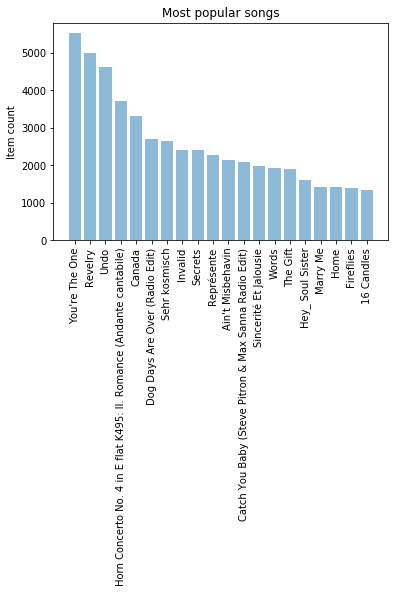

In [17]:
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index() 
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


title_list = (list(popular_songs_top_20['title']))
y_pos = np.arange(len(title_list))
listen_count = list(popular_songs_top_20['listen_count'])

plt.bar(y_pos, popular_songs_top_20['listen_count'], align='center', alpha=0.5)
plt.xticks(y_pos, title_list, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular songs')


## Most popular releases (Top 20 releases)

Text(0.5,1,'Most popular releases')

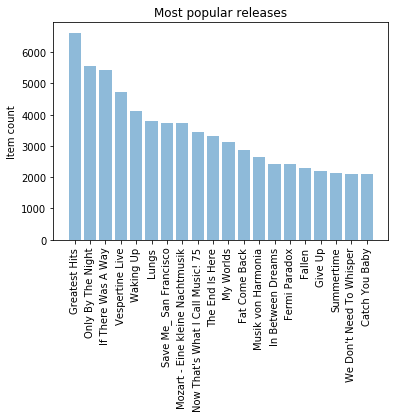

In [25]:
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index() 
popular_release_top_20 = popular_release.sort_values('listen_count', ascending=False).head(20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


release_list = (list(popular_release_top_20['release']))
y_pos = np.arange(len(release_list))
listen_count = list(popular_release_top_20['listen_count'])

plt.bar(y_pos, popular_release_top_20['listen_count'], align='center', alpha=0.5)
plt.xticks(y_pos, release_list, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular releases')


## Most popular artists (Top 20 artists)

Text(0.5,1,'Most popular artists')

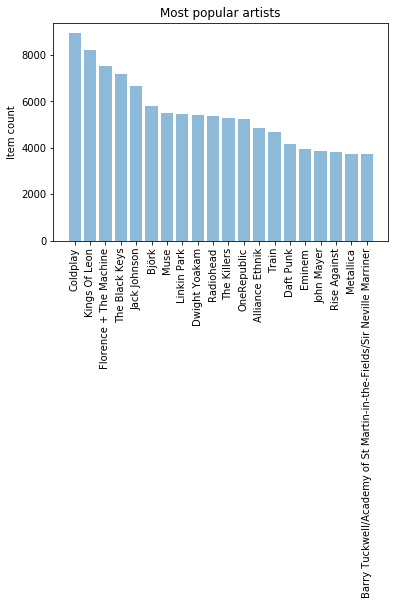

In [26]:
popular_artists = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index() 
popular_artists_top_20 = popular_artists.sort_values('listen_count', ascending=False).head(20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


artists_list = (list(popular_artists_top_20['artist_name']))
y_pos = np.arange(len(artists_list))
listen_count = list(popular_artists_top_20['listen_count'])

plt.bar(y_pos, popular_artists_top_20['listen_count'], align='center', alpha=0.5)
plt.xticks(y_pos, artists_list, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular artists')


## Song count distribution

In [7]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(
by='title',ascending = False)
user_song_count_distribution.head(10)

,user,title
343,4e11f45d732f4861772b2906f81a7d384552ad12,809
1145,ee7aa84c164038c963cfd02a7e52a5598aa470c3,523
266,3e6ef2a572d1f6f06df71bf28190eae9e1934a61,508
483,6a944bfe30ae8d6b873139e8305ae131f1607d5f,497
411,5b498bef2e926769cbd71f9aa3009149deabe2f2,489
912,be21ec120193effd2a5e545c4bafa2e1f92e9816,473
85,13ce57b3a25ef63fa614335fd838e8024c42ec17,472
405,5a905f000fc1ff3df7ca807d57edb608863db05d,443
1142,ee30810179c611d32705fe0b71333dcb8703b30a,441
20,043d81932e75d5749ed5758d6420506e7bc457a5,435


In [8]:
user_song_count_distribution.title.describe()

count    1234.000000
mean      105.962723
std        80.736222
min         4.000000
25%        50.000000
50%        86.000000
75%       140.000000
max       809.000000
Name: title, dtype: float64

In [0]:
import matplotlib.pyplot as plt

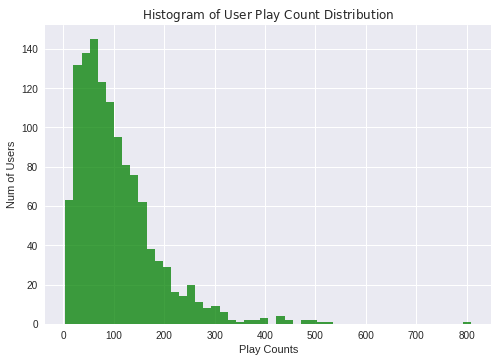

In [10]:
x = user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title(r'$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $')
plt.grid(True)
plt.show()